## <u> Amazon Product Review Analysis </u>

##### Objective -> Data Preparation 
##### Datasets used -> Tools-Home Improvement and Patio-Lawn-Garden 

In [2]:
#importing libraries 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import json
import pandas as pd
import gzip

#functions for loading json file 
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

## <u> Data Importing</u> 

#### Review files :

In [141]:
# Review file Patio-Lawn-Garden
Patio_Lawn_and_Garden_5= getDF("C:\capstone\Patio_Lawn_and_Garden_5.json.gz")
print(Patio_Lawn_and_Garden_5.shape)                     #checking the shape

(798415, 12)


In [142]:
# Review file Tools and Home Improvement
Tools_and_Home_Improvement_5= getDF("C:\capstone\Tools_and_Home_Improvement_5.json.gz") 
print(Tools_and_Home_Improvement_5.shape)                 #checking the shape

(2070831, 12)


#### Rating files : 

In [62]:
# Rating file Patio-Lawn-Garden
Patio_Lawn_and_Garden_rating=pd.read_csv("C:\capstone\csv files\Patio_Lawn_and_Garden.csv",header=None)     
Patio_Lawn_and_Garden_rating.columns=['asin','reviewerID','overall','unixReviewTime']   #accessing required columns

# Rating file Tools and Home Improvement
Tools_and_Home_Improvement_rating=pd.read_csv("C:\capstone\csv files\Tools_and_Home_Improvement.csv",header=None)
Tools_and_Home_Improvement_rating.columns=['asin','reviewerID','overall','unixReviewTime']    #accessing required columns

##### Processing unixReviewTime

In [63]:
import datetime
Tools_and_Home_Improvement_rating['review_date']=int()
Patio_Lawn_and_Garden_rating['review_date']=int()

#function for unixReviewTime conversion 
def date_convertor(x):
    value = datetime.datetime.fromtimestamp(x)
    return(f"{value:%Y-%m-%d}")

#converting unixReviewTime in both rating files
Patio_Lawn_and_Garden_rating['review_date']=Patio_Lawn_and_Garden_rating['unixReviewTime'].apply(lambda x :date_convertor(x))
Tools_and_Home_Improvement_rating['review_date']=Tools_and_Home_Improvement_rating['unixReviewTime'].apply(lambda x :date_convertor(x))

In [174]:
# Downloading files to csv format
Tools_and_Home_Improvement_rating.to_csv('Tools_and_Home_Improvement_rating.csv',index=False)
Patio_Lawn_and_Garden_rating.to_csv('Patio_Lawn_and_Garden_rating.csv',index=False)

#### Meta data files :

In [25]:
# importing meta data  
# meta data reading (used virtual machine (AWS)) after extracting to gz file format to json format and then converting it into csv format

meta_garden= getDF("C:/capstone/meta data/meta_Patio_Lawn_and_Garden.json.gz") 
meta_data_tools=pd.read_csv('tools_meta_all_data.csv')    #converting to csv 

### <u>Understanding Data</u> (Review & Rating) 

In [78]:
list_to_review=[Patio_Lawn_and_Garden_5,Tools_and_Home_Improvement_5,Patio_Lawn_and_Garden_rating,Tools_and_Home_Improvement_rating]
list_to_review1=['Patio_Lawn_and_Garden_review','Tools_and_Home_Improvement_review','Patio_Lawn_and_Garden_rating','Tools_and_Home_Improvement_rating']

for data,name in zip(list_to_review,list_to_review1):
    print('--------------------------------')
    print('Data set name =',name)                                #name of dataset
    print('--------------------------------')
    print('Data set shape =',data.shape)                         #data set shape 
    print('--------------------------------')                   
    print('Data set datatype=\n',data.dtypes)                    #data types 
    print('--------------------------------')
    print('Missing value checking for', name ,'dataset')
    print(data.isnull().sum())                                   #missing values in columns
    print('-------------------------------------------')
    print('Percentage of missing values in dataframe')   
    per=((data.isnull().sum()/len(data)*100))                    #percentage of missing values 
    print('columns with of missing values between 0 to 30%')
    per0_35=per[(per.values > 0) & (per.values <30)]             #columns with 0-30% missing values
    print(per0_35)                                               # over all percentage
    print('--------------------------------------------')
    per_30=per[per.values>30]                                    # columns with more than 30% missing values
    print('columns with more than 30% of missing values')
    print(per_30)
    print('*'*100)

--------------------------------
Data set name = Patio_Lawn_and_Garden_review
--------------------------------
Data set shape = (798415, 9)
--------------------------------
Data set datatype=
 overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
dtype: object
--------------------------------
Missing value checking for Patio_Lawn_and_Garden_review dataset
overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName       27
reviewText        186
summary           156
unixReviewTime      0
dtype: int64
-------------------------------------------
Percentage of missing values in dataframe
columns with of missing values between 0 to 30%
reviewerName    0.003382
reviewText      0.023296
summary         0.019539
dtype: float64
---------------------------

### <u>Understanding Data</u> (Meta data) 

In [20]:
list1=[meta_garden,meta_data_tools]     # meta data
list2=['meta_garden','meta_data_tools']
for data,name in zip(list1,list2):
    print('--------------------------------')
    print('Data set name =',name)                                #name of dataset
    print('--------------------------------')
    print('Data set shape =',data.shape)                         #data set shape
    print('--------------------------------')
    print('Data set datatype=\n',data.dtypes)                    #data types 
    print('--------------------------------') 
    print('Missing value checking for', name ,'dataset')
    print(data.isnull().sum())                                   #missing values in columns
    print('-------------------------------------------')
    per=((data.isnull().sum()/len(data)*100))                    #percentage of missing values 
    print('columns with of missing values between 0 to 30%')
    per0_35=per[(per.values > 0) & (per.values <30)]             #columns with 0-30% missing values
    print(per0_35)                                               # over all percentage
    print('--------------------------------------------')
    per_30=per[per.values>30]                                    # columns with more than 30% missing values
    print('columns with more than 30% of missing values')
    print(per_30)
    print('*'*50)
 

--------------------------------
Data set name = meta_garden
--------------------------------
Data set shape = (279456, 19)
--------------------------------
Data set datatype=
 category           object
tech1              object
description        object
fit                object
title              object
also_buy           object
tech2              object
brand              object
feature            object
rank               object
also_view          object
main_cat           object
similar_item       object
date               object
price              object
asin               object
imageURL           object
imageURLHighRes    object
details            object
dtype: object
--------------------------------
Missing value checking for meta_garden dataset
category            0
tech1               0
description         0
fit                 0
title               0
also_buy            0
tech2               0
brand               0
feature             0
rank                0
also_view      

### <u>Review files Preprocessing</u>

##### Missing value treatment in review files

In [143]:
#for missing value treatment in review files
def missing_value_treatment(df):
    df.drop(columns={'vote','style','image','unixReviewTime'},axis=1,inplace=True)    #dropping columns having more than 30% missing values

missing_value_treatment(Tools_and_Home_Improvement_5)                # review file Tools_and_Home_Improvement
missing_value_treatment(Patio_Lawn_and_Garden_5)                     # review file Patio-Lawn-Garden

In [144]:
#Patio-Lawn-Garden file
#finding indexes of rows with null values
in1=Patio_Lawn_and_Garden_5[Patio_Lawn_and_Garden_5['reviewerName'].isnull()].index
Patio_Lawn_and_Garden_5.drop(in1,inplace=True)                  #dropping rows containg null values
in2=Patio_Lawn_and_Garden_5[Patio_Lawn_and_Garden_5['reviewText'].isnull()].index
Patio_Lawn_and_Garden_5.drop(in2,inplace=True)
in3=Patio_Lawn_and_Garden_5[Patio_Lawn_and_Garden_5['summary'].isnull()].index
Patio_Lawn_and_Garden_5.drop(in3,inplace=True)

#Tools Home and Improvement file
#finding indexes of rows with null values
in4=Tools_and_Home_Improvement_5[Tools_and_Home_Improvement_5['reviewerName'].isnull()].index
Tools_and_Home_Improvement_5.drop(in4,inplace=True)             #dropping rows containg null values
in5=Tools_and_Home_Improvement_5[Tools_and_Home_Improvement_5['reviewText'].isnull()].index
Tools_and_Home_Improvement_5.drop(in5,inplace=True)
in6=Tools_and_Home_Improvement_5[Tools_and_Home_Improvement_5['summary'].isnull()].index
Tools_and_Home_Improvement_5.drop(in6,inplace=True)

##### Processing 'reviewTime' column 

In [146]:
#processing date column in review files
from datetime import datetime
# Parse the input string as a date
def process_date(date_string):
    date = datetime.strptime(date_string, "%m %d, %Y")
# Format the date as a string in the desired output format
    output_string = date.strftime("%m-%d-%Y")

    return output_string  # Output: "09-01-2016"

#converting reviewtime column in review files
Tools_and_Home_Improvement_5['reviewTime']=Tools_and_Home_Improvement_5['reviewTime'].apply(lambda x:process_date(x))
Patio_Lawn_and_Garden_5['reviewTime']=Patio_Lawn_and_Garden_5['reviewTime'].apply(lambda x:process_date(x))

In [292]:
Tools_and_Home_Improvement_5.head()                    #checking head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,5.0,True,01-28-2018,AL19QO4XLBQPU,0982085028,J. Mollenkamp,"returned, decided against this product",Five Stars
1,5.0,True,11-30-2017,A1I7CVB7X3T81E,0982085028,warfam,Awesome heater for the electrical requirements...,Five Stars
2,5.0,True,09-12-2017,A1AQXO4P5U674E,0982085028,gbieber2,Keeps the mist of your wood trim and on you. B...,Five Stars
3,4.0,True,07-19-2017,AIRV678P7C4NK,0982085028,Justin Banner,"So far I hooked it up and tested it , filled a...",it is the perfect temp for a shower
4,1.0,True,05-25-2017,A22I5QDNTNECDW,0982085028,daveparker,"i installed this 10 months ago, instructions w...",worked well...for 10 months.


In [150]:
#converting clean review files to csv 
Patio_Lawn_and_Garden_5.to_csv('Patio_Lawn_and_Garden_5.csv',index=False)
Tools_and_Home_Improvement_5.to_csv('Tools_and_Home_Improvement_5.csv',index=False)

### <u>Meta data Preprocessing</u> (Patio-Lawn-Garden)

In [20]:
pd.set_option('display.max_rows', None)           #displaying all rows

In [26]:
#accessing required columns
meta_data_garden=meta_garden[['category', 'asin', 'main_cat', 'brand', 'price', 'title','rank']]

##### Finding RANK in meta data (Processing rank column)

In [27]:
# Convert the values in the column to lists if they are in strings
def to_list(value):
    if isinstance(value, str):
        return value.split()
    return value
#converting strings to list in meta data : Patio-Lawn-garden
meta_data_garden['rank'] = meta_data_garden['rank'].apply(to_list)

# preprocessing (removing ># and selecting only digits)
import re
def rank_process(i):
    v =''
    for k in range(0,len(i)):
        c = re.sub('\>\#','',i[k].split()[0])   # working i[k] here i is list ex- [>#23,756 hello world][0] 
        c = re.sub('\D+','',c)
        v = v + ' ' + c
    return v

#Processing rank column in meta data : Patio-Lawn-Garden
meta_data_garden['returned_rank']=meta_data_garden['rank'].apply(lambda x:rank_process(x))

#finding indexes where returned rank is empty
index4=meta_data_garden[meta_data_garden['returned_rank']==''].index  # removing 1 spaces
meta_data_garden.drop(index4,inplace=True)             #dropping indexes where returned rank is empty

#accessing main category rank from returned rank column 
meta_data_garden['main_cat_rank']=meta_data_garden['returned_rank'].apply(lambda x:str(x).split()[0])

#dropping extra column : returned rank 
meta_data_garden.drop(columns=['returned_rank','rank'],inplace=True,axis=1)

##### Processing 'main_cat' column

In [28]:
# Removing noise from main_cat column : finding indexes with noise
index_name=meta_data_garden[(meta_data_garden['main_cat']=='<img src="https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" class="nav-categ-image" alt="AMAZON FASHION"/>')|(meta_data_garden['main_cat']=='<img src="https://m.media-amazon.com/images/G/01/digital/music/logos/amzn_music_logo_subnav._CB471835632_.png" class="nav-categ-image" alt="Digital Music"/>')|(meta_data_garden['main_cat']=='<img src="https://images-na.ssl-images-amazon.com/images/G/01/digital/music/logos/amzn_music_logo_subnav._CB471835632_.png" class="nav-categ-image" alt="Digital Music"/>')| (meta_data_garden['main_cat']=='')].index
meta_data_garden.drop(index_name,inplace=True) #dropping indexes with noise

##### Processing 'price' column

In [29]:
# Removing noise from price column from garden : finding indexes with noise
index_price=meta_data_garden[(meta_data_garden['price']=='')|(meta_data_garden['price']=='.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab')].index
meta_data_garden.drop(index_price,inplace=True)  #dropping indexes with noise

# cleaning price column from garden meta data 
import re
def process_price(file):    
    result=re.sub('[$]','',file)
    result = re.sub(r"\-\s\d+\.\d+", "", result)
    result = re.sub(r"\-\s\d+", "", result)
    return result

#cleaning price column
meta_data_garden['price']=meta_data_garden['price'].apply(lambda x: process_price(x))

##### Processing 'brand' & 'title' column

In [31]:
# droping space noise from brand and title : finding indexes with empty data
index_brand=meta_data_garden[meta_data_garden['brand']==''].index
meta_data_garden.drop(index_brand,inplace=True)    #dropping indexes with empty data

index_title=meta_data_garden[meta_data_garden['title']==''].index
meta_data_garden.drop(index_title,inplace=True)    #dropping indexes with empty data

In [170]:
#converting clean meta data to csv file 
meta_data_garden.to_csv('meta_data_garden.csv',index=False)

### <u>Meta data Preprocessing</u> (Tools and Home Improvement)

In [32]:
meta_data_tools=pd.read_csv('tools_meta_all_data.csv')  # loading meta file

In [33]:
meta_rank_clean=pd.read_csv('meta_tools_rank.csv')  # loading rank file
#adding rank column to meta file
meta_data_tools['rank']=meta_rank_clean['rank']

meta_data_tools['rank']=meta_data_tools['rank'].astype(str)  # converting to string type

##### Processing 'rank' column

In [34]:
import re
#function for cleaning rank column 
def clean_rank(value):
    d=re.sub('\D+',' ',value)
    return d
#cleaning rank column in Tools and Home Improvement meta data
meta_data_tools['main_cat_rank']=meta_data_tools['rank'].apply(lambda x:clean_rank(x))

In [35]:
#function for accessing first rank out of three ranks avaliable in column 
def split(value):
    v=value.split()[0]
    return v

#accessing desired rank and storing in main_cat_rank column
meta_data_tools['main_cat_rank']=meta_data_tools['rank'].apply(lambda x:split(x))

#dropping column 'rank'
meta_data_tools.drop(columns='rank',inplace=True,axis=1)

##### Missing value treatment

In [36]:
meta_data_tools.dropna(inplace=True,axis=0)              #dropping null values

##### Processing month and year columns

In [37]:
#merging date columns (month and year)
meta_data_tools['date2']=meta_data_tools['date']+"-"+meta_data_tools['Unnamed: 7']
meta_data_tools.drop(columns=['date','Unnamed: 7'],axis=1,inplace=True)             #dropping separate month and date columns
meta_data_tools.rename(columns={'date2':'date'},inplace=True)                       #renaming date column 

##### Processing 'category' column

In [38]:
#finding indexes in category column with empty data
index_category=meta_data_tools[meta_data_tools['category']=='[]'].index  
meta_data_tools.drop(index_category,inplace=True)   #dropping indexes with empty data

##### Processing 'date' column

In [39]:
#finding indexes in date column with noise
index_date=meta_data_tools[(meta_data_tools['date']=='<div class="a-fixed-left-grid a-spacing-none"><div class="a-fixed-left-grid-inner" style="padding-left:280px"><div class="a-fixed-left-grid-col a-col-left" style="width:280px;margin-left:-280px;float:left;"><span class="a-declarative" data-action="reviews:filter-action:push-state" data-reviews:filter-action:push-state="{&quot;scrollToSelector&quot;:&quot;#reviews-filter-info&quot;-&quot;allowLinkDefault&quot;:&quot;1&quot;}"><table id="histogramTable" class="a-normal a-align-middle a-spacing-base" role="presentation"><tr class="a-histogram-row"><td class="aok-nowrap"><span aria-hidden="true" class="a-size-base">5 star</span><span class="a-offscreen">5 star (0%)</span><span class="a-letter-space"></span>') | (meta_data_tools['date']=='<div class="a-fixed-left-grid a-spacing-none"><div class="a-fixed-left-grid-inner" style="padding-left:280px"><div class="a-fixed-left-grid-col a-col-left" style="width:280px;margin-left:-280px;float:left;"><span class="a-declarative" data-action="reviews:filter-action:push-state" data-reviews:filter-action:push-state="{&quot;scrollToSelector&quot;:&quot;#reviews-filter-info&quot;-&quot;allowLinkDefault&quot;:&quot;1&quot;}"><table id="histogramTable" class="a-normal a-align-middle a-spacing-base" role="presentation"><tr data-reftag="cm_cr_dp_d_hist_5" data-reviews-state-param="{&quot;filterByStar&quot;:&quot;five_star&quot;') ].index
meta_data_tools.drop(index_date,inplace=True)     #dropping indexes with noise

##### Processing 'main_cat' column

In [40]:
#finding indexes with noise in main_cat column
index_main=meta_data_tools[(meta_data_tools['main_cat']=='<img src="https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" class="nav-categ-image" alt="AMAZON FASHION"/>') | (meta_data_tools['main_cat']=='<img src="https://m.media-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" class="nav-categ-image" alt="AMAZON FASHION"/>')].index
meta_data_tools.drop(index_main,inplace=True)    #dropping indexes with noise

##### Processing 'brand' column

In [44]:
#finding indexes containing noise (three spaces) in brand column
index_brand=meta_data_tools[meta_data_tools['brand  ']=='  '].index  # removing 3 spaces
meta_data_tools.drop(index_brand,inplace=True)       #dropping indexes with noise

##### Processing 'price' column

In [48]:
#finding indexes with noise in price column
index_price=meta_data_tools[(meta_data_tools['price']==".a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228")| (meta_data_tools['main_cat']=='.a-section.a-spacing-mini{margin-bottom:6px!important;margin-top:10px}#actionPanel #availability{font-size:17px!important;font-weight:400!important}#actionPanel #availability p#pa_other_website_text{color:#888!important;margin-top:6px}#actionPanel #merchant-info{font-size:13px;color:#333}#actionPanel #pa_avaliability_message{font-size:12px!important;font-weight:400!important}#actionPanel #pa_avaliability_message a{white-space:normal!important}#actionPanel #pa_avaliability_message span{color:#888!important}#actionPanel #availability-brief #availability+br{display:none}// This is an empty file #actionPanel #bbop-sbbop-container{margin-bottom:0}#actionPanel .buybox-main{padding:0 40px}#actionPanel #priceblock_ourprice_row span.feature img{padding-top:8px!important}#actionPanel #onetimeOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger)')|(meta_data_tools['price']=='.a-section.a-spacing-mini{margin-bottom:6px!important;margin-top:10px}#actionPanel #availability{font-size:17px!important;font-weight:400!important}#actionPanel #availability p#pa_other_website_text{color:#888!important;margin-top:6px}#actionPanel #merchant-info{font-size:13px;color:#333}#actionPanel #pa_avaliability_message{font-size:12px!important;font-weight:400!important}#actionPanel #pa_avaliability_message a{white-space:normal!important}#actionPanel #pa_avaliability_message span{color:#888!important}#actionPanel #availability-brief #availability+br{display:none}// This is an empty file #actionPanel #bbop-sbbop-container{margin-bottom:0}#actionPanel .buybox-main{padding:0 40px}#actionPanel #priceblock_ourprice_row span.feature img{padding-top:8px!important}#actionPanel #onetimeOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger)')].index
meta_data_tools.drop(index_price,inplace=True)     #dropping indexes with noise

#applying process_price() defined above  for cleaning price column 
meta_data_tools['price']=meta_data_tools['price'].apply(lambda x: process_price(x))

In [58]:
#converting price column datatype to numeric
meta_data_tools['price']=pd.to_numeric(meta_data_tools['price'])

##### Processing 'date' column

In [46]:
import datetime
#defining function to convert date to desired format
def date_process(datestring):
    # Parse the original date string
    date = datetime.datetime.strptime(datestring,"%b-%d-%Y")
    # Format the parsed date as a new string
    new_date_string = date.strftime("%m-%d-%Y")
    return new_date_string                            # converting date from this 'mar-06-2014' to 03-06-2014

#converting date in meta data : Tools and Home Improvement
meta_data_tools['date']=meta_data_tools['date'].apply(lambda x:date_process(x))   

In [59]:
#converting cleaned data to csv
meta_data_tools.to_csv('meta_data_tools.csv',index=False)

In [263]:
meta_data_tools.head(5)                     #checking head()

,asin,category,title,main_cat,brand,price,main_cat_rank,date
10,1441309985,"['Tools & Home Improvement', 'Lighting & Ceili...",Trio Reading Light Value Pack,Tools & Home Improvement,Peter Pauper Press,31.90,123249,06-09-2014
13,1590651669,"['Tools & Home Improvement', 'Paint, Wall Trea...",Pantone Plus Series FORMULA Guides Solid Coate...,Tools & Home Improvement,Pantone,129.99,121170,05-08-2010
14,1590653289,"['Tools & Home Improvement', 'Paint, Wall Trea...",PANTONE GP1501 Plus Series Formula Guide Coate...,Tools & Home Improvement,Pantone,134.95,250367,03-04-2014
15,1590651529,"['Tools & Home Improvement', 'Paint, Wall Trea...",Pantone Plus Series GP4001 CMYK Coated &amp; U...,Tools & Home Improvement,Pantone,129.99,985951,05-08-2010
17,1594412324,"['Tools & Home Improvement', 'Paint, Wall Trea...",Carson Dellosa Leopard Print Borders (1242),Office Products,Carson-Dellosa,7.55,284955,10-17-2017


### <u>Checking dataframe shapes</u>

In [64]:
print('tool_review=',Tools_and_Home_Improvement_5.shape)
print('garden_review',Patio_Lawn_and_Garden_5.shape)
print('tool_rating =',Tools_and_Home_Improvement_rating.shape)
print('garden_rating =',Patio_Lawn_and_Garden_rating.shape)
print('garden_meta =',meta_data_garden.shape)
print('tool_meta =',meta_data_tools.shape)

NameError: name 'Tools_and_Home_Improvement_5' is not defined

### <u>Merging dataframes</u>

In [65]:
#Merging Rating & Meta data files
garden=pd.merge(Patio_Lawn_and_Garden_rating,meta_data_garden,on='asin')
tool=pd.merge(Tools_and_Home_Improvement_rating,meta_data_tools,on='asin')

In [66]:
tool.rename(columns={'brand  ':'brand','title ':'title'},inplace=True)   #renaming tool and home improv. columns for merging

In [67]:
#joining rating and meta files of Patio-Lawn-Garden & Tools and Home Improvement
Final=garden.append(tool)

#converting merged dataframe to csv 
Final.to_csv('Final_merge.csv',index=False)

In [68]:
Final.columns   #checking columns

Index(['asin', 'reviewerID', 'overall', 'unixReviewTime', 'review_date',
       'category', 'main_cat', 'brand', 'price', 'title', 'main_cat_rank',
       'date'],
      dtype='object')

In [274]:
#merging tools home and  improvement & patio,lawn,garden file
sentiment=Tools_and_Home_Improvement_5.append(Patio_Lawn_and_Garden_5)

#making new column 'text' with reviewtext and summary
sentiment['text']=sentiment['reviewText']+' '+sentiment['summary']

sentiment.drop(columns=['reviewText','summary'],inplace=True)  #dropping reviewtext and summary
sentiment['overall']=sentiment['overall'].astype(int)    #converting overall column to integer dtype

sentiment.to_csv('sentiment_data.csv',index=False)       #converting merged dataframe to csv

### <u>Data Visualization</u>

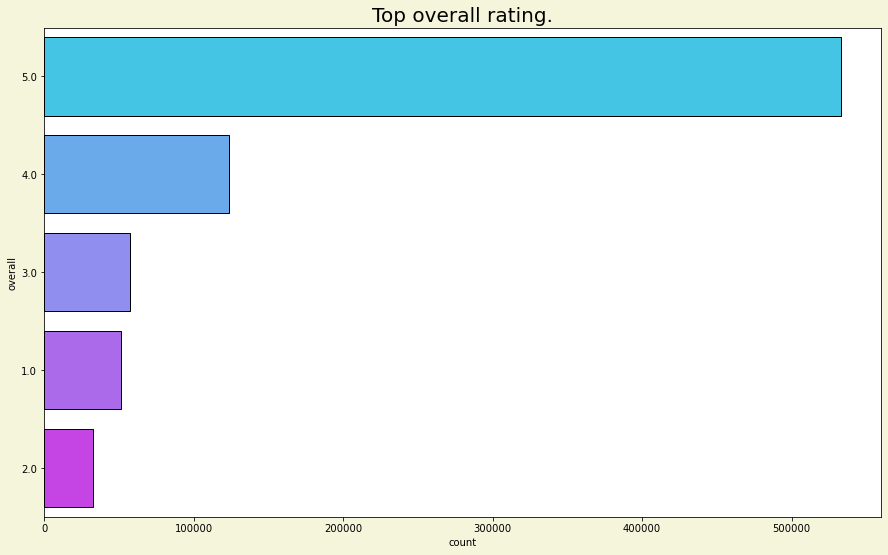

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,9),facecolor='beige')
plt.title('Top overall rating.',fontsize=(20))
sns.countplot(y=Patio_Lawn_and_Garden_5['overall'],ec='black',palette='cool',order = Patio_Lawn_and_Garden_5['overall'].value_counts().index);


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,9),facecolor='beige')
plt.title('Top overall rating.',fontsize=(20))
sns.countplot(y=Patio_Lawn_and_Garden_5['asin'],ec='black',palette='cool',order = Patio_Lawn_and_Garden_5['asin'].value_counts().index);


In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
c = Patio_Lawn_and_Garden_5['overall'].value_counts()
d = Patio_Lawn_and_Garden_5['overall'].value_counts().index
e = Patio_Lawn_and_Garden_5['verified'].value_counts()
f = Patio_Lawn_and_Garden_5['verified'].value_counts().index

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])
fig.add_trace(go.Pie(values=c,labels=d,name="Overall"),1,1)
fig.add_trace(go.Pie(values=e,labels=f,name="Verified"),1,2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig.update_layout(
    title_text="Donuts",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Overall', x=0.18, y=0.5, font_size=20,showarrow=False),
                 dict(text='Verified', x=0.82, y=0.5, font_size=20, showarrow=False)])